In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from utils import load_parquet_to_df_list, z_normalize
from approximation.paa import PAA
from discretization.sax.sax import SAX
from discretization.sax.adaptive_sax import AdaptiveSAX
from discretization.sax.one_d_sax import OneDSAX
from discretization.sax.symbol_mapping import IntervalNormMedian
from discretization.sax.graphics import plot_sax_variants
from discretization.sax.extended_sax import ExtendedSAX

In [2]:
path = "../../../0_data/UCRArchive_2018/SwedishLeaf/train"
df = load_parquet_to_df_list(path)
df = pd.concat(df, axis=1)
df_norm = z_normalize(df["signal"]).iloc[:, :2]

In [3]:
paa = PAA(window_size=6)
df_paa = paa.transform(df_norm)
df_paa_inv = paa.inv_transform(df_paa, df_norm.shape[0])

In [4]:
sax = SAX(alphabet_size=26)
df_sax = sax.transform(df_paa)
symbol_mapping = IntervalNormMedian(alphabet_size=sax.alphabet_size, var=1)
df_sax_inv = sax.inv_transform(df_sax, df_norm.shape[0], paa.window_size, symbol_mapping)

In [5]:
a_sax = AdaptiveSAX(alphabet_size=26)
df_a_sax, df_breakpoints = a_sax.transform(df_paa)
symbol_mapping = IntervalNormMedian(alphabet_size=a_sax.alphabet_size, var=1)
df_a_sax_inv = a_sax.inv_transform(df_a_sax, df_norm.shape[0], paa.window_size, symbol_mapping, df_breakpoints)

c:\users\danie\documents\karlsruhe\03_kit_studium\07_semester\bachelorarbeit\bachelorarbeit\repo\implementation\1_code\src\discretization\sax\adaptive_sax.py:438: UserWarning: Use the chosen 'symbol_mapping' strategy with caution, because in the aSAX, the breakpoint intervals are not (primarily) determined based on a Gaussian distribution.
  warnings.warn("Use the chosen 'symbol_mapping' strategy with "


In [6]:
one_d_sax = OneDSAX(alphabet_size_avg=8, alphabet_size_slope=8)
df_one_d_sax = one_d_sax.transform(df_paa, df_norm, paa.window_size)
symbol_mapping_avg = IntervalNormMedian(alphabet_size=one_d_sax.alphabet_size_avg, var=1)
symbol_mapping_slope = IntervalNormMedian(alphabet_size=one_d_sax.alphabet_size_slope, var=one_d_sax.var_slope)
df_one_d_sax_inv = one_d_sax.inv_transform(df_norm, df_one_d_sax, paa.window_size, symbol_mapping_avg, symbol_mapping_slope)

c:\users\danie\documents\karlsruhe\03_kit_studium\07_semester\bachelorarbeit\bachelorarbeit\repo\implementation\1_code\src\discretization\sax\one_d_sax.py:202: UserWarning: Make sure you have initialized the chosen 'symbol_mapping_slope' strategy with the variance of the Gaussian distribution that was used to determine the breakpoint intervals for the segment slopes.
  warnings.warn("Make sure you have initialized the chosen "


In [7]:
e_sax = ExtendedSAX(alphabet_size=26)
df_e_sax, df_sax_mean, df_sax_max, df_sax_min = e_sax.transform(df_paa, df_norm, paa.window_size)
symbol_mapping = IntervalNormMedian(alphabet_size=e_sax.alphabet_size, var=1)
df_e_sax_inv = e_sax.inv_transform(df_sax_mean, df_sax_max, df_sax_min, df_norm.shape[0], paa.window_size, symbol_mapping)

[code for plotting SAX variants is from here](https://tslearn.readthedocs.io/en/stable/auto_examples/misc/plot_sax.html#sphx-glr-auto-examples-misc-plot-sax-py)

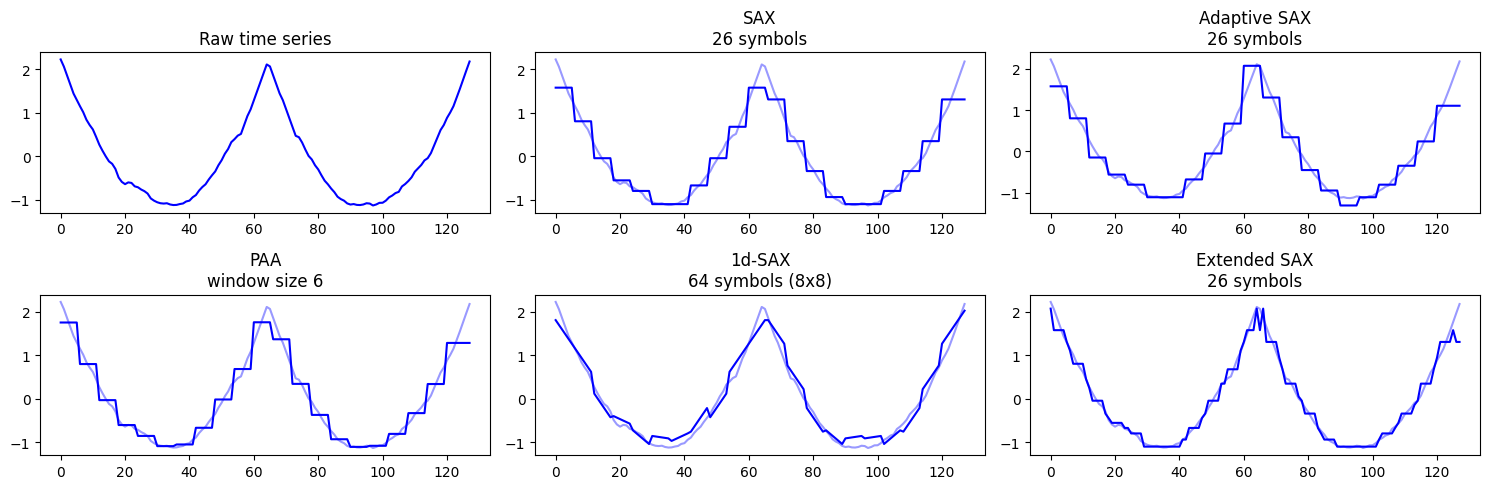

In [8]:
plot_sax_variants(df_norm, df_paa_inv, df_sax_inv, df_a_sax_inv, df_one_d_sax_inv, df_e_sax_inv,
                  paa.window_size, sax.alphabet_size, a_sax.alphabet_size, one_d_sax.alphabet_size_avg, one_d_sax.alphabet_size_slope, e_sax.alphabet_size, 0)